   Rk                       Player  Age Pos   Tm  GP   G   A  PTS  plusminus  \
0   1     Connor McDavid\mcdavco01   20   C  EDM  82  30  70  100         27   
1   2      Sidney Crosby\crosbsi01   29   C  PIT  75  44  45   89         17   
2   3        Patrick Kane\kanepa01   28  RW  CHI  82  34  55   89         11   
3   4  Nicklas Backstrom\backsni02   29   C  WSH  82  23  63   86         17   
4   5    Nikita Kucherov\kucheni01   23  RW  TBL  74  40  45   85         13   

   ...   TOI       ATOI   BLK  HIT    FOW    FOL  FO_percent  HART  Votes  \
0  ...  1733  21.133333  29.0   34  348.0  458.0        43.2     1   1604   
1  ...  1491  19.883333  27.0   80  842.0  906.0        48.2     0   1104   
2  ...  1754  21.400000  15.0   28    7.0   44.0        13.7     0    206   
3  ...  1497  18.266667  33.0   45  685.0  648.0        51.4     0     60   
4  ...  1438  19.433333  20.0   30    0.0    0.0         0.0     0    119   

   Season  
0    2017  
1    2017  
2    2017  
3    201

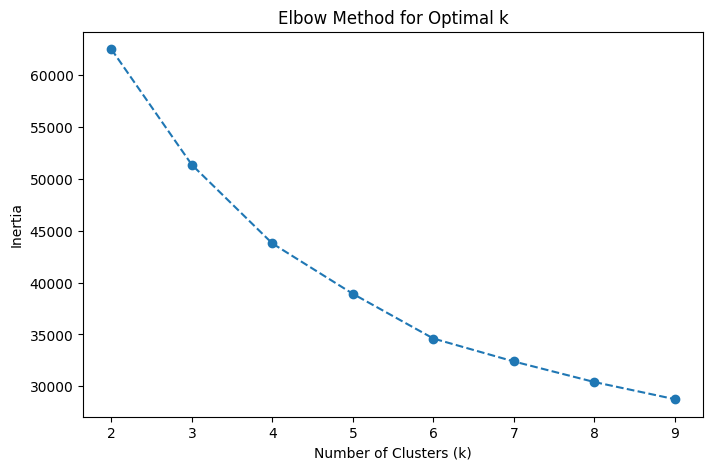

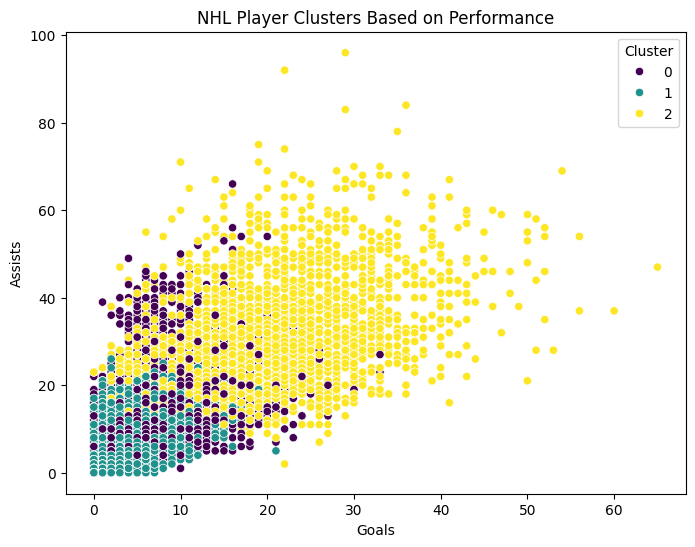

Clustered data sample:
                 G          A  plusminus        BLK         HIT          TOI  \
Cluster                                                                        
0         7.164620  15.379356  -1.739130  75.848324  109.668105  1232.210753   
1         2.489557   4.277640  -2.022930   7.982328   17.384694   381.420476   
2        19.821227  30.292869   4.747595  20.407960   38.445771  1352.648093   

         FO_percent  
Cluster              
0         24.092798  
1         15.646896  
2         26.612338  


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset with encoding handling
file_path = "C:/Users/jkann/Downloads/NHL 2004-2018 Player Data.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Display first few rows
print(df.head())

# Select relevant features for clustering
features = ["G", "A", "plusminus", "BLK", "HIT", "TOI", "FO_percent"]
df_selected = df[features].dropna()  # Remove rows with missing values

# Standardize data for fair clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Determine optimal k using the Elbow Method
inertia = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method results
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Apply K-Means clustering with optimal k (e.g., k=3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_selected["Cluster"] = kmeans.fit_predict(scaled_data)

# Visualize clusters using Goals vs Assists
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_selected["G"], y=df_selected["A"], hue=df_selected["Cluster"], palette="viridis")
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.title("NHL Player Clusters Based on Performance")
plt.show()

# Display sample of clustered data
print("Clustered data sample:")
print(df_selected.groupby("Cluster").mean())